In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import sdeSimulation, blackScholes

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 5.5$ and $\\sigma = 0$')

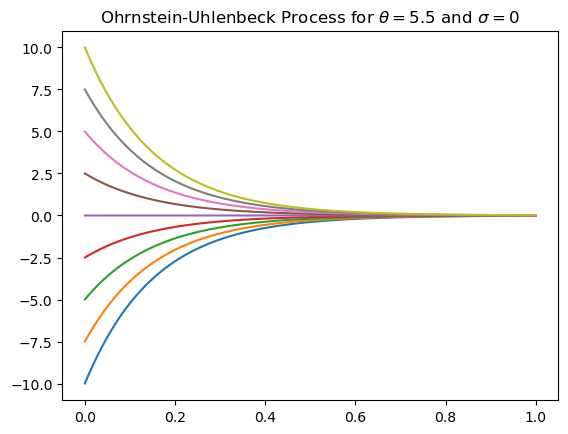

In [6]:
results = sdeSimulation(1e4, 1, 0, 3.5) # steps, x0, sigma, theta
initialConditions = np.arange(-10, 12.5, 2.5)
sigmaList = np.arange(-10, 12.5, 2.5)
plotList = []

for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 0, 3.5)[1], sdeSimulation(1e4, i, 0, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 5.5$ and $\sigma = 0$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ and $\\sigma = 0.5$')

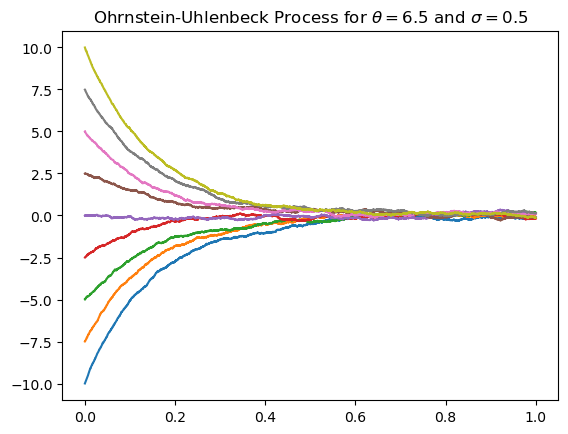

In [7]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 0.5, 3.5)[1], sdeSimulation(1e4, i, 0.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ and $\sigma = 0.5$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ $\\sigma = 5.5$')

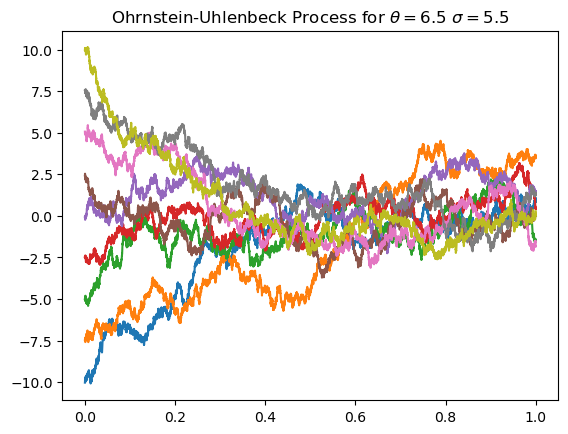

In [8]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 5.5, 3.5)[1], sdeSimulation(1e4, i, 5.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ $\sigma = 5.5$")

Text(0.5, 1.0, 'Ohrnstein-Uhlenbeck Process for $\\theta = 6.5$ $\\sigma = 10.5$')

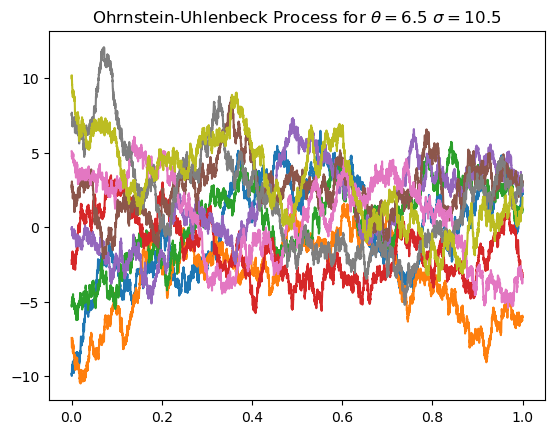

In [9]:
for i in initialConditions:
    plotList.append(plt.plot(sdeSimulation(1e4, i, 10.5, 3.5)[1], sdeSimulation(1e4, i, 10.5, 6.5)[0]))

plt.title(r"Ohrnstein-Uhlenbeck Process for $\theta = 6.5$ $\sigma = 10.5$")

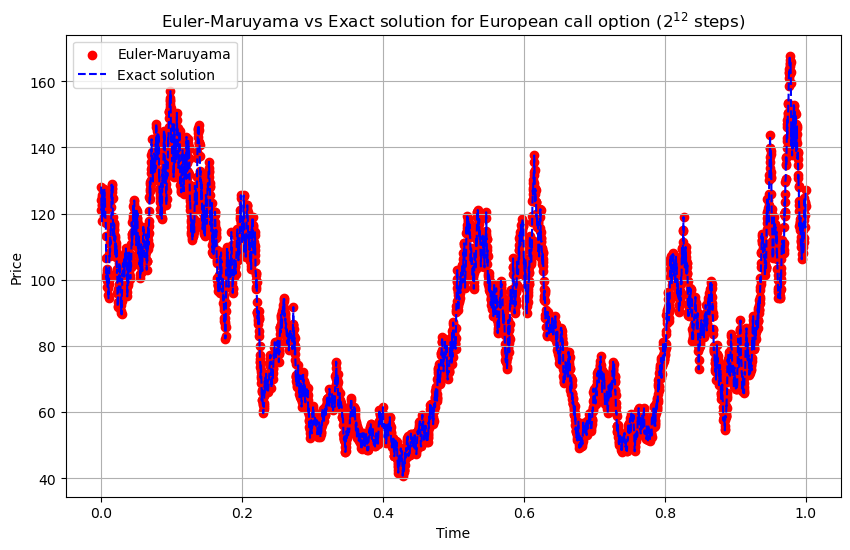

In [19]:
initialConditions = [2**12, 130, 1.6, 0.6]
results = blackScholes(*initialConditions)

plt.figure(figsize=(10, 6))
plt.title("Euler-Maruyama vs Exact solution for European call option ($2^{12}$ steps)")
plt.scatter(results[1], results[2], color = 'red', label = "Euler-Maruyama")
plt.plot(results[1], results[0], color = "blue", label = "Exact solution", ls="--")
plt.xlabel("Time")
plt.grid(True)
plt.ylabel("Price")
plt.legend()

In [20]:
mse = sum(results[-1])/len(results[-1])
print(f"MSE: {mse:.4f}")

MSE: 0.0004
